# Module Imports


In [221]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set_theme(style="darkgrid")

# Mount Drive

In [222]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## EDA
Use Mode method to fill the missing datapoints of all 'object' type features and Mean/Median methods for all numuric type features.
*   use Median method for skewed(negative/positive) numeric feature and 
*   use MEAN/Median for non-skewd/symetrical numeric feature


### Read Data

In [223]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Week 2/data/AdSmartABdata.csv', na_values=['undefined','?', None])

In [224]:
db

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [225]:
db.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

In [245]:
db.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

#### The dataset is 8077x9 with 5 object type and 4 int64 type columns

### Utility Functions

In [246]:
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 3), "%", "missing values.")


# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


# pd.options.display.float_format = format_float

### Missing Values

In [247]:
percent_missing(db)

The dataset contains 0.0 % missing values.


In [248]:
missing_values_table(db)

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


#### The dataset has no missing values

### Unique Values
* Categorical data
* Numeric Data


In [249]:
def Select_categorical_numeric(df:pd.DataFrame):
  global categorical_col 
  categorical_col = []
  global numeric_col
  numeric_col = []
  for column in df.columns:
    if df[column].dtypes == "object":
      categorical_col.append(column)
    if df[column].dtypes == "int64":
      numeric_col.append(column)
  print(f"Categorical Columns: {categorical_col}")
  print(f"Numeric Columns: {numeric_col}")


### Categorical and Numeric Columns

In [250]:
Select_categorical_numeric(db)

Categorical Columns: ['auction_id', 'experiment', 'date', 'device_make', 'browser']
Numeric Columns: ['hour', 'platform_os', 'yes', 'no']


## Count Unique Values of Variables

#### Each column combination is unique in the dataset

In [251]:
db.value_counts(normalize=False, sort=True, ascending=False, dropna=True)
# db.no.nunique()#(axis=1, dropna=True) # also works

auction_id                            experiment  date        hour  device_make         platform_os  browser                yes  no
0008ef63-77a7-448b-bd1e-075f42c55e39  exposed     2020-07-10  8     Generic Smartphone  6            Chrome Mobile          0    0     1
aa14b324-5c46-4b3a-8e75-18d78968495b  exposed     2020-07-08  16    Generic Smartphone  6            Chrome Mobile          0    0     1
aa84454c-a749-4c98-bf9f-1f99c04416af  exposed     2020-07-08  16    Generic Smartphone  6            Chrome Mobile          1    0     1
aa6ecb40-6a48-4c06-a611-4c9aa9023ea8  control     2020-07-03  15    Samsung SM-A715F    6            Facebook               0    0     1
aa6c6cda-e498-4e8f-b886-1d969bd376ea  exposed     2020-07-08  14    Samsung SM-A202F    6            Samsung Internet       0    0     1
                                                                                                                                      ..
56c87344-e876-41a3-9011-feb8f7e58cd5  exposed 

### Unique Values of each Variable

In [252]:
for column in db.columns:
  print(f"{column} has {db[column].nunique()} unique values.")

auction_id has 8077 unique values.
experiment has 2 unique values.
date has 8 unique values.
hour has 24 unique values.
device_make has 270 unique values.
platform_os has 3 unique values.
browser has 15 unique values.
yes has 2 unique values.
no has 2 unique values.


### Statistical Variable Relationship Visualization 
* To analyse brand awarness, the important features of the dataset are 
> * experiment
> * yes and 
> * no 
* The important yes/no combinations for awarness analysis are 
> * yes = 1 - no = 0 and 
> * yes = 0 - yes = 1




In [253]:
db_explore = db[["auction_id","experiment", "yes", "no"]]

### Dataset for Awareness Analysis
* awareness = 1 if yes = 1 and no = 0
* awareness = 0 if yes = 0 and no = 1
* invalid data if yes = 1 and no = 1
* not relevant if yes =0 and no = 0

In [254]:
db_awareness = db_explore.query("not ((yes == 0 & no == 0) or (yes == 1 & no == 1))")
db_awareness

,auction_id,experiment,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,0,1
...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,0,1


In [255]:
db_awareness["aware"] = db_awareness["yes"]
db_awareness["not aware"] = db_awareness["no"]
db_awareness.drop(columns = ['yes','no'], inplace = True)
db_awareness

,auction_id,experiment,aware,not aware
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,0,1
...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,0,1


In [295]:
db_awareness_summary = db_awareness.pivot_table( index='experiment', aggfunc='sum')
# db_awareness_summary["total"] = db_awareness.pivot_table( index='experiment', aggfunc='count')
db_awareness_summary

,aware,not aware
experiment,,
control,264,322
exposed,308,349


In [296]:
db_awareness_summary.columns

Index(['aware', 'not aware'], dtype='object')

### Experiment-Yes Relationships

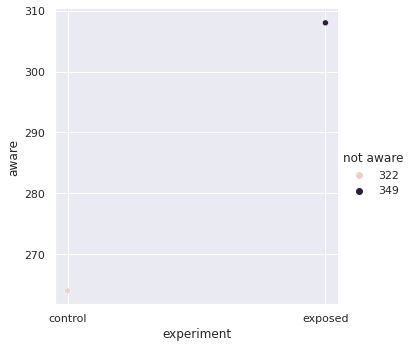

In [257]:
sns.relplot(x="experiment", y="aware", hue="not aware", data =db_awareness_summary)# style="smoker",data=db);

In [258]:
db_awareness_summary['aware']

experiment
control    264
exposed    308
Name: aware, dtype: int64

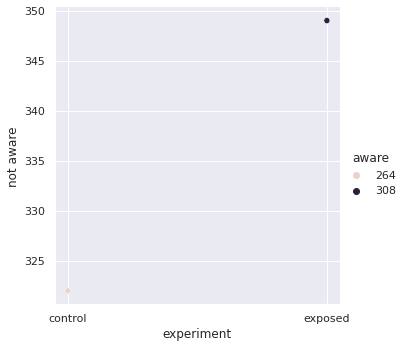

In [259]:
sns.relplot(x="experiment", y="not aware", hue="aware", data =db_awareness_summary)# style="smoker",data=db);

In [260]:
db_awareness_summary["not aware"]

experiment
control    322
exposed    349
Name: not aware, dtype: int64

In [281]:
db_awareness_summary['aware']['control']

264

In [284]:
db_awareness_summary['not aware']['control']

322

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([263.5, 263.6, 263.7, 263.8, 263.9, 264. , 264.1, 264.2, 264.3,
        264.4, 264.5]),
 <a list of 10 Patch objects>)

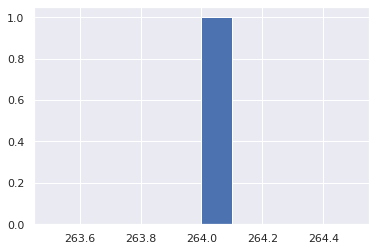

In [290]:
plt.hist(db_awareness_summary['aware']['control'])